In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [4]:
df = pd.read_csv("../clean_data.csv")
print("Finished reading csv")

/Users/ecevarol/opt/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Finished reading csv


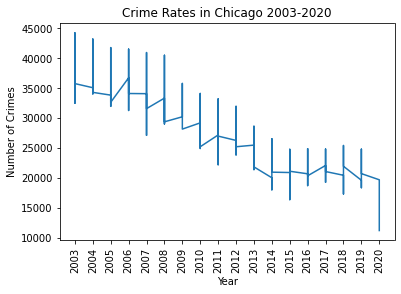

In [9]:
#Remove 2001 and 2002
list = df[df['Year'] == 2001].index.tolist()
df.drop(list, inplace = True)
list = df[df['Year'] == 2002].index.tolist()
df.drop(list, inplace = True)
years = range(2003,2021)
months = range(1,13)

#Graph the general trend
groups = df.groupby(["Year", "Month"]).size()
groups = groups.to_frame(name = 'size').reset_index()

fig, ax = plt.subplots()
ax.plot(groups["Year"], groups["size"])
ax.set_xlabel("Year")
ax.set_ylabel("Number of Crimes")
ax.set_title("Crime Rates in Chicago 2003-2020")
plt.xticks(years, rotation=90)
fig.savefig('general_overview.png')

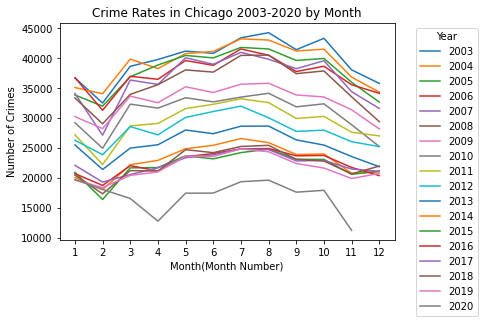

In [10]:
groups = df.groupby(["Year", "Month"]).size()
groups = groups.to_frame(name = 'size').reset_index()

fig, ax = plt.subplots()
for i in years:
    test = groups[groups.Year == i]
    ax.plot(test["Month"], test["size"], label = i)
ax.set_xlabel("Month(Month Number)")
ax.set_ylabel("Number of Crimes")
ax.set_title("Crime Rates in Chicago 2003-2020 by Month")
plt.legend(bbox_to_anchor=(1.05, 1), title="Year")
plt.xticks(months)
fig.savefig('monthly_overview.png')